# Install or download agrid

In [1]:
#! pip install agrid -q

In [2]:
# If agrid is not on the Python path, append relative path
#import sys
#sys.path.append('..')

In [4]:
from agrid.grid import Grid
from agrid.acc import download

import numpy as np



ant = Grid(crs=3031, res = [25*km, 25*km], 
           left = -3100*km, up=3100*km, 
           right = 3100*km, down = -3100*km)

print('Number of cells in (Y and X) direction', ant.nn, ', (Y, X, Z) direction', ant.nnn)

Number of cells in (Y and X) direction (248, 248) , (Y, X, Z) direction (248, 248, 5)


In [5]:
print(ant.ds)

<xarray.Dataset>
Dimensions:  (RGB: 3, X: 248, X_edge: 249, Y: 248, Y_edge: 249, Z: 5, Z_edge: 6)
Coordinates:
  * X        (X) float32 -3100000.0 -3074898.8 ... 3074898.8 3100000.0
  * Y        (Y) float32 -3100000.0 -3074898.8 ... 3074898.8 3100000.0
  * Z        (Z) float32 0.0 8000.0 16000.0 40000.0 350000.0
  * X_edge   (X_edge) float32 -3112500.0 -3087399.2 ... 3087399.2 3112500.0
  * Y_edge   (Y_edge) float32 -3112500.0 -3087399.2 ... 3087399.2 3112500.0
  * Z_edge   (Z_edge) float64 -4e+03 4e+03 1.2e+04 2.8e+04 1.95e+05 5.05e+05
  * RGB      (RGB) <U1 'R' 'G' 'B'
    XV       (Y, X) float32 -3100000.0 -3074898.8 ... 3074898.8 3100000.0
    YV       (Y, X) float32 -3100000.0 -3100000.0 ... 3100000.0 3100000.0
    lat      (Y, X) float32 -51.15066 -51.296318 ... -51.296318 -51.15066
    lon      (Y, X) float32 -135.0 -135.23291 -135.46771 ... 44.76709 45.0
Data variables:
    *empty*


Saved to: chess.pdf


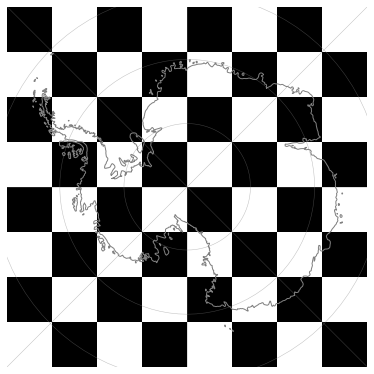

In [7]:
checkerboard = np.kron([[1, 0] * 4, [0, 1] * 4] * 4, 
                       np.ones(np.array(ant.nn)//8))

ant.ds['CHESS'] = (('Y', 'X'), checkerboard)

ant.map_grid(checkerboard, save_name='chess.pdf', figsize = (5,5))

In [12]:
url_land_polygon = ('https://www.naturalearthdata.com/'
       'http//www.naturalearthdata.com/'
       'download/10m/physical/ne_10m_land.zip')

download(url_land_polygon, 
        'data/ne_10m_land.zip', 
        meta_dict={'Type' : 'Land Polygons'})

Content:  text/html; charset=UTF-8
File data/ne_10m_land.zip already exists.


['ne_10m_land.README.html',
 'ne_10m_land.VERSION.txt',
 'ne_10m_land.cpg',
 'ne_10m_land.dbf',
 'ne_10m_land.prj',
 'ne_10m_land.shp',
 'ne_10m_land.shx']

In [13]:
ant.ds['LAND'] = (('Y', 'X'), 
                     -1 < ant.assign_shape('data/ne_10m_land.shp', 'scalerank') )

ant.ds['LAND'] = ant.ds['LAND'].where(ant.ds['LAND'])

/Users/tobias_stal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


Saved to: quick_guide.pdf


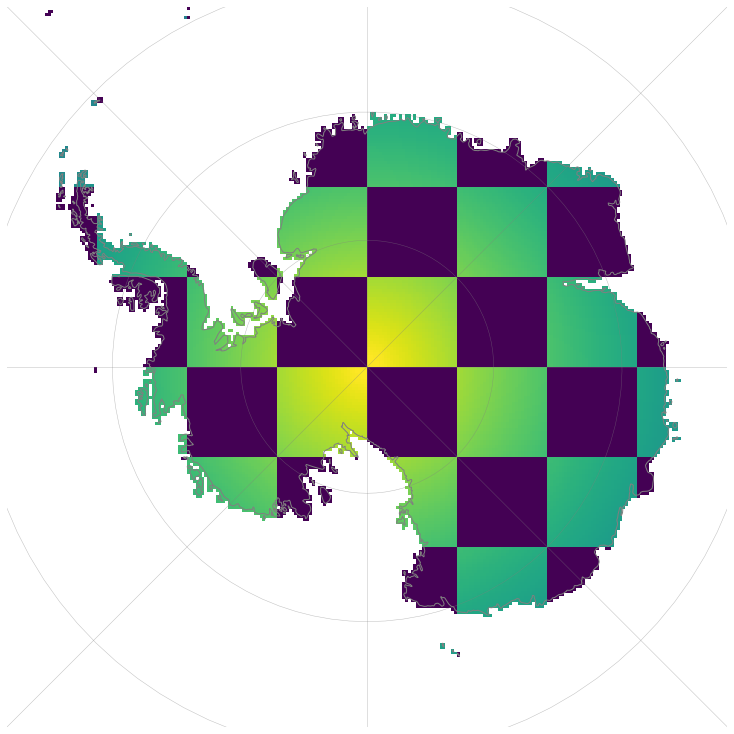

In [14]:
example = ant.ds['LAND']*ant.ds['CHESS']*ant.ds.coords['lat']**2 # Some really advanced statistics

ant.map_grid(example, cmap='viridis', 
             save_name='quick_guide.pdf')

In [1]:
!pwd

/Users/tobias_stal/proj/Frontiers
